# Protocolo de Teleportación

### Primero teleportamos el estado $|1\rangle$ 

In [3]:
from qiskit import *

In [4]:
circuit= QuantumCircuit(3,3)

In [5]:
%matplotlib inline

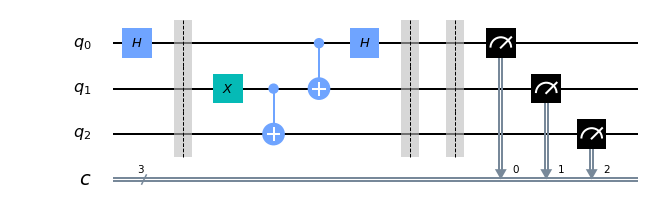

In [6]:
# Preparamos el estado a ttransp
circuit.h(0)
circuit.barrier()
#Entangle Q1 y Q2
circuit.x(1)
circuit.cx(1,2)
#Entangle de Q0 y Q1 (y por ende de todo)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
#circuit.cx(1,2)
#circuit.cz(0,2)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.measure(2,2)
circuit.draw(output = "mpl")

In [7]:
# Esperamos que el estado |1> esté ahora en el qubit q2
simulator = Aer.get_backend('qasm_simulator')

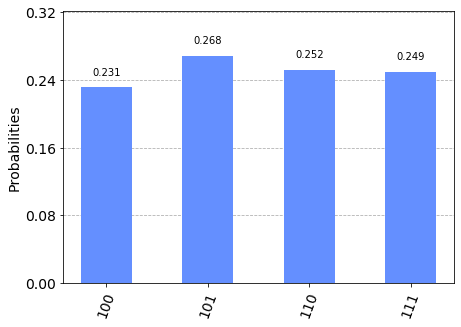

In [8]:
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

Vemos  que sea cual sea la medicón, el estado $|1\rangle$ ya está en el qubit de Bob ($q_3$). Recordemos que en Qiskit q[n] es el primero, q[0] es el último del string

# Teleportar el estado $|+\rangle$

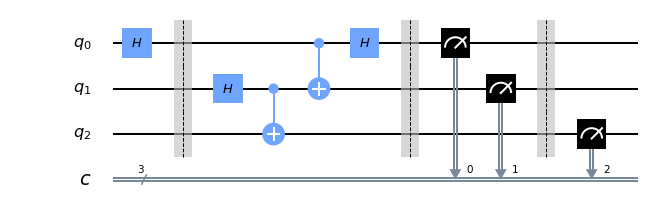

In [9]:
circ2=QuantumCircuit(3,3)
circ2.h(0)
circ2.barrier()
circ2.h(1)
circ2.cx(1,2)
circ2.cx(0,1)
circ2.h(0)
circ2.barrier()
circ2.measure([0,1],[0,1])
circ2.barrier()
circ2.measure(2,2)
circ2.draw(output="mpl")

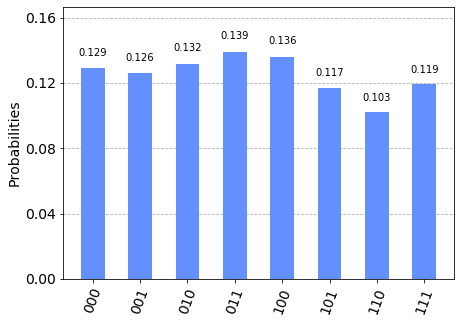

In [10]:
results2 = execute(circ2, backend = simulator, shots = 1024).result()
counts2 = results2.get_counts()
plot_histogram(counts2)


### Analizando los resultados:

Cuando Alice mida cualquiera de los 4 estados posibles, aproximadamente la mitad de las veces obtendrá $|0\rangle$ y la otra mitad $|1\rangle$. Esto corresponde con el estado inicial $|+\rangle$.